In [1]:
#First we import everything
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import re
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from statistics import mode

In [2]:
df_churndata = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_churndata.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

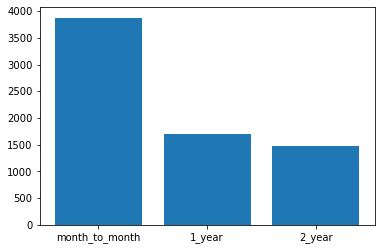

In [3]:
# plt.hist(df_churndata1.Contract)

contract_month_to_month = (df_churndata['Contract'].value_counts())
x = ['month_to_month', '1_year', '2_year']
plt.bar(x, contract_month_to_month)
contract_month_to_month

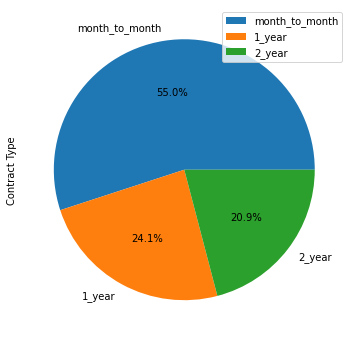

In [4]:
#Pie chart of Contract types

d = {'Contract Type': [3875, 1695, 1473]}
df_pie_contract_types = pd.DataFrame(data=d, index=['month_to_month','1_year','2_year'])
plot = df_pie_contract_types.plot.pie(y='Contract Type', autopct='%1.1f%%', figsize=(6, 6))

In [5]:
#I want to find out Churn data in each Contract type

churn_yes = df_churndata['Churn'] == 'Yes'
churn_yes_df = df_churndata[churn_yes]
# Contract_month2month = 

In [6]:
m2m = churn_yes_df['Contract'] == 'Month-to-month'
churn_yes_df[m2m].Contract.value_counts()

Month-to-month    1655
Name: Contract, dtype: int64

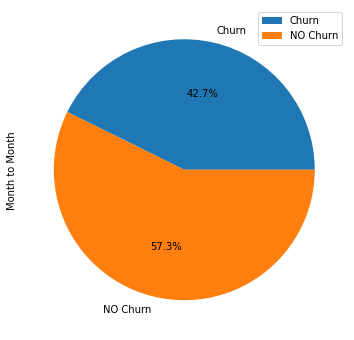

In [7]:
#Contract Pie chart month to month
d = {'Month to Month': [1655, 2220]}
df_pie_m2m = pd.DataFrame(data=d, index=['Churn','NO Churn'])
plot = df_pie_m2m.plot.pie(y='Month to Month', autopct='%1.1f%%', figsize=(6, 6))

In [8]:
one_year = churn_yes_df['Contract'] == 'One year'
churn_yes_one_year = churn_yes_df[one_year]
# churn_yes_one_year.info()
#166 yes churn and 1473 total, meaning 1307 no churn

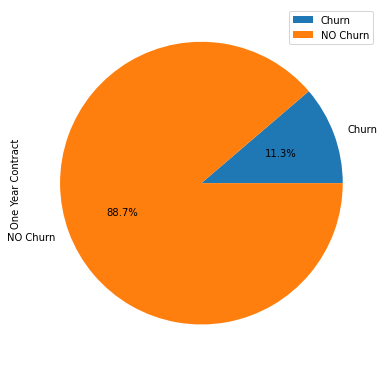

In [9]:
d = {'One Year Contract': [166, 1307]}
df_pie_1yr = pd.DataFrame(data=d, index=['Churn','NO Churn'])
plot = df_pie_1yr.plot.pie(y='One Year Contract', autopct='%1.1f%%', figsize=(6.5, 6.5))

In [10]:
two_year = churn_yes_df['Contract'] == 'Two year'
churn_yes_two_year = churn_yes_df[two_year]
# churn_yes_two_year.info()
#48 yes churn entries, 1695 total, meaning 1647 no churns

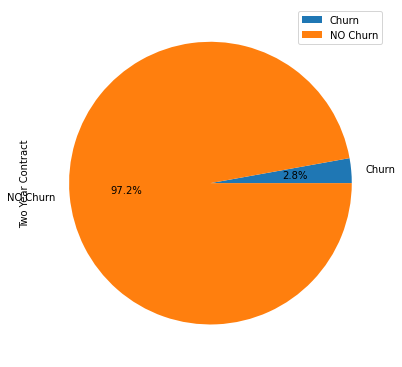

In [11]:
d = {'Two Year Contract': [48, 1647]}
df_pie_2yr = pd.DataFrame(data=d, index=['Churn','NO Churn'])
plot = df_pie_2yr.plot.pie(y='Two Year Contract', autopct='%1.1f%%', figsize=(6.5, 6.5))

In [12]:
#Based on above data, we can see that month-to-month contracts show the highest churn and longer contracts trend lower churn

Text(0.5, 0.98, 'test')

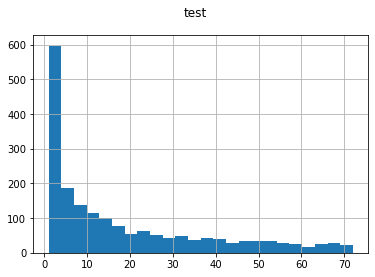

In [15]:
#NOW WE LOOK AT TENURE VS CHURN
#split the tenure into yes churn vs no churn
#See how big each dataframe is
#Make a histogram plot of each dataframe 
#get averages and all that stuff for tenure months
#make an observation of the data
import matplotlib.pyplot as pl
churn_yes_df['tenure'].hist(bins = 24)
churn_yes_df['tenure'].shape[0]
pl.suptitle("test")

In [15]:
churn_yes_df['tenure'].value_counts(bins=24)
#We see a significant amount between 1-4 months

(0.928, 3.958]      597
(3.958, 6.917]      187
(6.917, 9.875]      139
(9.875, 12.833]     114
(12.833, 15.792]     99
(15.792, 18.75]      78
(21.708, 24.667]     63
(18.75, 21.708]      54
(24.667, 27.625]     51
(30.583, 33.542]     49
(27.625, 30.583]     43
(36.5, 39.458]       42
(39.458, 42.417]     41
(33.542, 36.5]       37
(45.375, 48.333]     35
(51.292, 54.25]      35
(48.333, 51.292]     33
(66.083, 69.042]     27
(42.417, 45.375]     27
(54.25, 57.208]      27
(63.125, 66.083]     26
(57.208, 60.167]     25
(69.042, 72.0]       23
(60.167, 63.125]     17
Name: tenure, dtype: int64

<AxesSubplot:>

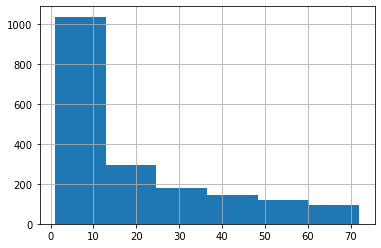

In [16]:
churn_yes_df['tenure'].hist(bins = 6)
#We see significant churns in the first 18 months with a major portion between 1-4 months

In [17]:
#First 12 months = 1037 total, with 597 churn in 1-4 months!!!
## 49.17% of the churn in the first 18 months happens in the first 4 months!!!!!!!!!!!!!
churn_yes_df['tenure'].value_counts(bins=6)

(0.928, 12.833]     1037
(12.833, 24.667]     294
(24.667, 36.5]       180
(36.5, 48.333]       145
(48.333, 60.167]     120
(60.167, 72.0]        93
Name: tenure, dtype: int64

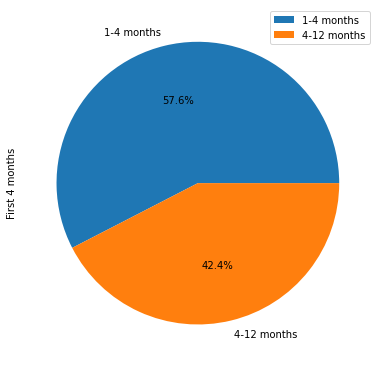

In [18]:
d = {'First 4 months': [597, 440]}
df_pie_1yr = pd.DataFrame(data=d, index=['1-4 months','4-12 months'])
plot = df_pie_1yr.plot.pie(y='First 4 months', autopct='%1.1f%%', figsize=(6.5, 6.5))
#more than half churns in the first 4 months! AVOID short term contracts!

In [19]:
churn_yes_df['tenure'].value_counts(bins=6)

(0.928, 12.833]     1037
(12.833, 24.667]     294
(24.667, 36.5]       180
(36.5, 48.333]       145
(48.333, 60.167]     120
(60.167, 72.0]        93
Name: tenure, dtype: int64

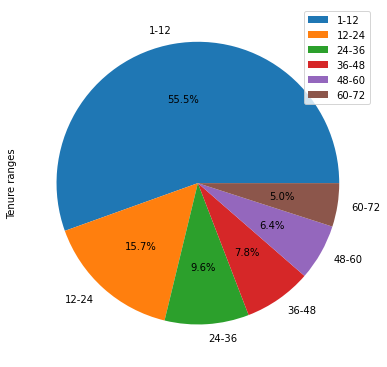

In [20]:
#I should move this up first in the presentation to show that there are significant amount of churns in the first year. Then dive deep into how much
p = churn_yes_df['tenure'].value_counts(bins=6).to_list()
d = {'Tenure ranges': p}
df_pie_tenures = pd.DataFrame(data=d, index=['1-12','12-24','24-36','36-48','48-60', '60-72'])
plot = df_pie_tenures.plot.pie(y='Tenure ranges', autopct='%1.1f%%', figsize=(6.5, 6.5))

In [21]:
print('YES CHURN - Mean tenure is: ',   churn_yes_df.tenure.mean().round(2),   'months.')
print('YES CHURN - Median tenure is: ', churn_yes_df.tenure.median().round(2), 'months.')
print('YES CHURN - Mode tenure is: ',   churn_yes_df.tenure.mode()[0],   'month.')
tenure_1 = churn_yes_df.tenure == 1
tenure_1.value_counts()
print('YES CHURN - The number of contracts with tenure of 1 month is 380.')

YES CHURN - Mean tenure is:  17.98 months.
YES CHURN - Median tenure is:  10.0 months.
YES CHURN - Mode tenure is:  1 month.
YES CHURN - The number of contracts with tenure of 1 month is 380.


In [22]:
churn_yes_df['tenure'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

5174

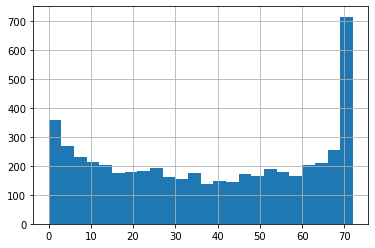

In [23]:
#Now we see NO Churn

churn_no = df_churndata['Churn'] == 'No'
churn_no_df = df_churndata[churn_no]
churn_no_df['tenure'].hist(bins=24)
churn_no_df['tenure'].shape[0]

In [24]:
#Would ya look at that? No churn shows the higher number of long term contracts

print('NO CHURN - Mean tenure is: ',   churn_no_df.tenure.mean().round(2),   'months.')
print('NO CHURN - Median tenure is: ', churn_no_df.tenure.median().round(2), 'months.')
print('NO CHURN - Mode tenure is: ',   churn_no_df.tenure.mode()[0],   'months.')
tenure_1 = churn_no_df.tenure == 72
tenure_1.value_counts()
print('NO CHURN - The number of contracts with tenure of 72 months is 356.')

NO CHURN - Mean tenure is:  37.57 months.
NO CHURN - Median tenure is:  38.0 months.
NO CHURN - Mode tenure is:  72 months.
NO CHURN - The number of contracts with tenure of 72 months is 356.


In [25]:
churn_no_df['tenure'].value_counts(bins=6)

(60.0, 72.0]      1314
(-0.073, 12.0]    1149
(12.0, 24.0]       730
(48.0, 60.0]       712
(24.0, 36.0]       652
(36.0, 48.0]       617
Name: tenure, dtype: int64

In [26]:
#What if we drop the tenure outliers?
#What if we removed the 1 and then re ran all the metrics?
#We if we removed the largest amount and then re-ran the avg, etc?

In [27]:
churn_no_df['tenure'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

In [28]:
#We see that mean for yes_churn is ~18 months and mean for no_churn is ~37.5 months almost double the amount.
#To reduce our churn, we need to let go of these 1 month people.

In [29]:
#Lets focus on churn spikes if there are any versus tenure
#Scatterplot/lineplot? tenure as the x axis, y = churn 0 or 1 as y axis
#How would I do this?

In [30]:
#Monthly Charges
#What is the monthly charge of a 1 month contract that churns? - Get rid of this program - unecessary amount of time is wasted here

# churn_yes_df.info()
momo = churn_yes_df[(churn_yes_df['tenure'] == 1)]
momo.MonthlyCharges.describe()


count    380.000000
mean      58.197368
std       23.816448
min       18.850000
25%       43.787500
50%       69.375000
75%       75.512500
max      102.450000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:>

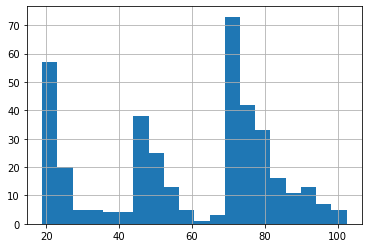

In [31]:
momo.MonthlyCharges.hist(bins=20)

<AxesSubplot:>

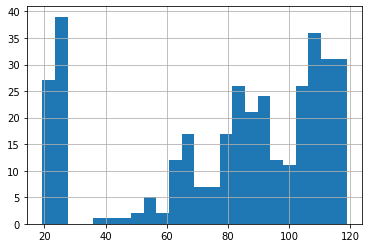

In [32]:
#Lets check no churn monthly charges
nomo = churn_no_df[(churn_no_df['tenure'] == 72)]
nomo.MonthlyCharges.hist(bins=24)

In [33]:
nomo.MonthlyCharges.describe()

count    356.000000
mean      80.423174
std       32.044927
min       19.300000
25%       64.800000
50%       88.700000
75%      108.225000
max      118.750000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:>

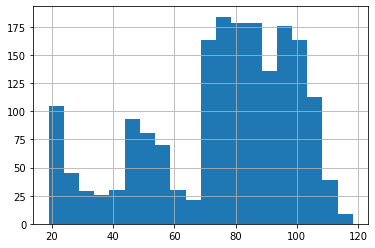

In [34]:
#Now lets just compare monthly charges vs churn
#We see that higher contract prices are in the higher churn percent
churn_yes_df.MonthlyCharges.hist(bins=20)

In [35]:
churn_yes_df.MonthlyCharges.value_counts(bins=20)

(73.575, 78.55]      186
(83.525, 88.5]       178
(93.475, 98.45]      176
(78.55, 83.525]      176
(68.6, 73.575]       163
(98.45, 103.425]     163
(88.5, 93.475]       136
(103.425, 108.4]     114
(18.75, 23.825]      105
(43.725, 48.7]        94
(48.7, 53.675]        80
(53.675, 58.65]       70
(23.825, 28.8]        45
(108.4, 113.375]      38
(58.65, 63.625]       30
(38.75, 43.725]       30
(28.8, 33.775]        29
(33.775, 38.75]       26
(63.625, 68.6]        21
(113.375, 118.35]      9
Name: MonthlyCharges, dtype: int64

In [36]:
churn_yes_df.MonthlyCharges.describe()

#We see here that higher mean price in the monthly charges that churned.

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

<AxesSubplot:>

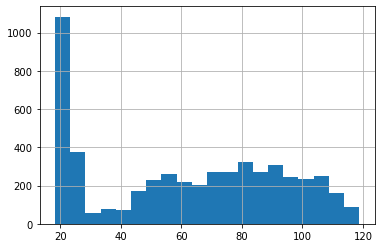

In [37]:
churn_no_df.MonthlyCharges.hist(bins=20)

In [38]:
#We see here that for the no churn category, that there is s significant amount of low contract prices which will have low churn
churn_no_df.MonthlyCharges.value_counts(bins=20)

(18.148999999999997, 23.275]    1083
(23.275, 28.3]                   375
(78.55, 83.575]                  325
(88.6, 93.625]                   305
(83.575, 88.6]                   273
(73.525, 78.55]                  272
(68.5, 73.525]                   272
(53.425, 58.45]                  261
(103.675, 108.7]                 249
(93.625, 98.65]                  248
(98.65, 103.675]                 233
(48.4, 53.425]                   227
(58.45, 63.475]                  216
(63.475, 68.5]                   204
(43.375, 48.4]                   173
(108.7, 113.725]                 163
(113.725, 118.75]                 88
(33.325, 38.35]                   77
(38.35, 43.375]                   73
(28.3, 33.325]                    57
Name: MonthlyCharges, dtype: int64

In [39]:
#so far, we see that we avoid month to month contracts, we focus on a contract price of $18-23
churn_no_df.MonthlyCharges.describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

In [40]:
#What is month to month contract pricing vs 1_year vs 2_year?
#Let us analyze total charges

In [41]:
#Rather than month to month, offer low prices but at least annual contracts
#Create a survey for customers who are churning to see if price was too high when they are leaving. Subjective feedback could also be useful



In [43]:
churn_no_df.TotalCharges.describe()

count     5174
unique    4966
top           
freq        11
Name: TotalCharges, dtype: object

In [45]:
churn_yes_df.TotalCharges.describe()

count     1869
unique    1732
top       20.2
freq         6
Name: TotalCharges, dtype: object

In [52]:
listblankindices = churn_no_df[(churn_no_df['TotalCharges'] == ' ')].index
churn_no_df.drop(listblankindices, inplace=True)
churn_no_df.reset_index(drop=True, inplace=True)
churn_no_df['TotalCharges'] = churn_no_df['TotalCharges'].astype(float)

<ipython-input-52-849a019bd932>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_no_df['TotalCharges'] = churn_no_df['TotalCharges'].astype(float)


In [53]:
churn_no_df.TotalCharges.value_counts(bins=20)

(10.145000000000001, 451.483]    1081
(451.483, 884.165]                604
(884.165, 1316.848]               518
(1316.848, 1749.53]               437
(1749.53, 2182.213]               291
(2182.213, 2614.895]              215
(3912.943, 4345.625]              193
(3047.578, 3480.26]               191
(3480.26, 3912.943]               190
(2614.895, 3047.578]              190
(5643.673, 6076.355]              176
(4778.308, 5210.99]               174
(4345.625, 4778.308]              167
(5210.99, 5643.673]               159
(6076.355, 6509.038]              139
(6509.038, 6941.72]               128
(6941.72, 7374.403]               108
(7374.403, 7807.085]               85
(7807.085, 8239.768]               75
(8239.768, 8672.45]                42
Name: TotalCharges, dtype: int64

<AxesSubplot:>

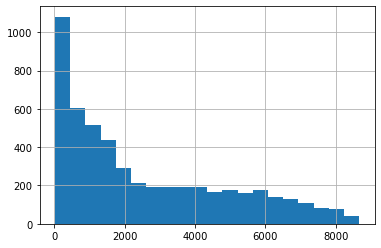

In [54]:
churn_no_df.TotalCharges.hist(bins=20)

In [55]:
listblankindices = churn_yes_df[(churn_yes_df['TotalCharges'] == ' ')].index
churn_yes_df.drop(listblankindices, inplace=True)
churn_yes_df.reset_index(drop=True, inplace=True)
churn_yes_df['TotalCharges'] = churn_yes_df['TotalCharges'].astype(float)

C:\Users\booos\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-55-ca779ab08f39>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_yes_df['TotalCharges'] = churn_yes_df['TotalCharges'].astype(float)


<AxesSubplot:>

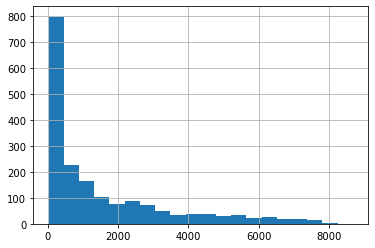

In [57]:
churn_yes_df.TotalCharges.hist(bins=20)

In [58]:
churn_yes_df.TotalCharges.value_counts(bins=20)

(10.183, 452.148]       799
(452.148, 885.445]      225
(885.445, 1318.742]     167
(1318.742, 1752.04]     104
(2185.337, 2618.635]     89
(1752.04, 2185.337]      77
(2618.635, 3051.932]     74
(3051.932, 3485.23]      51
(3918.527, 4351.825]     39
(4351.825, 4785.122]     37
(5218.42, 5651.718]      35
(3485.23, 3918.527]      34
(4785.122, 5218.42]      32
(6085.015, 6518.312]     26
(5651.718, 6085.015]     23
(6518.312, 6951.61]      20
(6951.61, 7384.907]      17
(7384.907, 7818.205]     15
(7818.205, 8251.502]      4
(8251.502, 8684.8]        1
Name: TotalCharges, dtype: int64

In [ ]:
#we see here total churn reflects the high number of early month to month churners

In [59]:
churn_yes_df.InternetService.value_counts()

Fiber optic    1297
DSL             459
No              113
Name: InternetService, dtype: int64

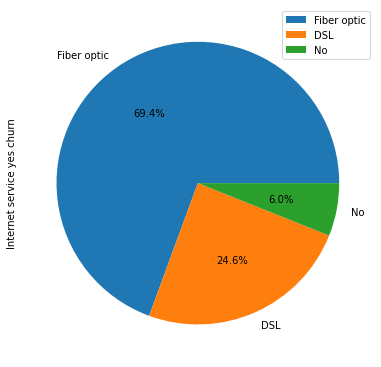

In [62]:
d = {'Internet service yes churn': [1297, 459, 113]}
df_Int_serv = pd.DataFrame(data=d, index=['Fiber optic','DSL', 'No'])
plot = df_Int_serv.plot.pie(y='Internet service yes churn', autopct='%1.1f%%', figsize=(6.5, 6.5))

In [61]:
churn_no_df.InternetService.value_counts()

DSL            1957
Fiber optic    1799
No             1407
Name: InternetService, dtype: int64

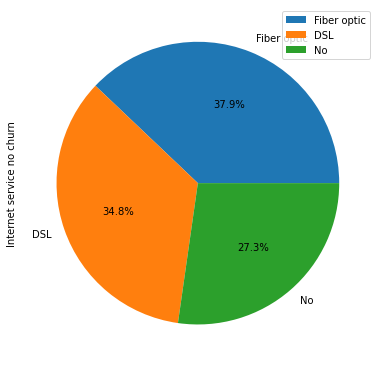

In [63]:
d = {'Internet service no churn': [1957, 1799, 1407]}
df_Int_serv1 = pd.DataFrame(data=d, index=['Fiber optic','DSL', 'No'])
plot = df_Int_serv1.plot.pie(y='Internet service no churn', autopct='%1.1f%%', figsize=(6.5, 6.5))

In [ ]:
# Recommendations based on the internet service type?
# Figure out if maybe a service provider type can be a reason for churn. Maybe the service provider is slower than the other. Location data and the major provider in the area
#Future work: need more data!
#Fiber optic customers are tied in with the phone plan for yes_churn
# - Maybe for customer retention strategy, investigate your fiber optic lines maybe offer less as an option to retain the customer
